### Import needed libraries 

In [2]:
import catheat
import numpy as np
import pandas as pd 
from functools import reduce 

%matplotlib inline
import glob
import os.path

#### Locate files
Define path to the directory that contains your files. Ideally for each experiment you will copy a folder that contains the template for these files and create your dataframe within this folder. 

In [3]:
path="/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv"
path

'/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv'

####  Step 1) Create list of paths in order to read in needed files. 
This list will contain the full path location to each file in the directory that contains your saved plate map csv's. This is needed so that we can read in each file later. In order to read these cvs's into python the program needs to know where to locate them. If the jupyter notebook is open in the flder where your files exist, you do not need to specify a path, however, if you have your files saved elsewhere this will allow you to access them regardless of where the notebook is opened. 

#### Step 1 simple case:
To create the path to one file in your directory you simply type out the entire path name. You can save it into a list or as a variable. The name of the path can be easily accessed by entering the folder that contains your files in the terminal and typing the command `pwd` to get the full path to that file. You simply add the file name with it's extension at the end of this path and copy this into your list or save it as a variable name for future use. 

In [5]:
## file path variable
file_path_variable='/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv'

## file path list 
file_path_example_list = ['/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv','/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/experimental_or_control.csv'] 

print(file_path_variable)
print(file_path_example_list)

/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv
['/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv', '/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/experimental_or_control.csv']


#### Step 1 complex case:
If you want to read in many csv's at once you can use the below command. This allows you to read in files in a folder that contain a specific shared characteristsic. In this case the .csv extension. This could also be used to select only files with other shared naming features. For example, if you wanted only files pertaining to cell number ( cell_number.csv and cell_number_1.csv calling the same command with `all_csv=glob.glob("{}/*cell_number*.csv".format(path))` will return a list containing any files that have the path name, followed by any characters, a cell number designation, any other charracters, and then a .csv extension. 

In [7]:
# f"{path}/filename" or "{}/filename".format(path), "{my_path}/filename".format(my_path=path}
all_csv=glob.glob("{}/*.csv".format(path))
all_csv

['/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv',
 '/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/experimental_or_control.csv',
 '/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/nuclease.csv',
 '/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/nucleofection_buffer.csv']

#### Code explained:

1) `glob.glob` The glob package allows access files using terminal/Unix calls. In this case, we are using the wild card to collect all the files that end with the extension ".csv" in the directory specified by path. We imported the matlab library glob to be able to use this function. 

2) There are several ways to combine the variable `path` which contains the string that references the absolute path to your files with each file that ends in .csv in that directory. The .format method sets an empty pair of curly brackets to be combined with /csv. The argument in .format is the variable that will be passed into those empty brackets. You could also write this as `all_csv=glob.glob("{my_path}/*.csv".format(my_path=path)` or `all_csv=glob.glob(f"{path}/*.csv")`. 

2a) `.format` method explained. This is a method used on strings. In the case above, we created a string with an empty set of brackets for which the path to the csv is needed. Using the .format method on this string allows you to pass an argument into this method that will fill in the value placed in the argument in the location in the string where the empty bracket placeholders are. This is useful here because it allows us to change the `path` vairable in the above code to collect files from any pre-designated path which we save to the variable `path`.

    

### 2) Access file name from their path names. 
We will want to access the file names from their full path names so that as each dataframe is read into the notebook we can name it according to it's file name and also use this file name to save information identifying information about the files we read in later. 

#### 2a) Simple case for one file.
What we want to do here is extract the file name from the path extension and also remove the .csv extenson. 

This will require the inport of os.path which is a module that allows useful path name manipulations. 

#### 2a.1) first we remove the path name 
This returns a string that have only the file_name.ext using the .basename() method. 
This method is the same as returning the second element in the tuple created by calling the .split method on your path name. The .split method splits your path into two components, head and tail, where tail is the very last pathname component and head is everything leading up to this. Notice below that if you call the second element ( index 1) in the tuple, you get only the file_name.csv. 

In [8]:
print(os.path.basename('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv'))
print(os.path.split('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv'))
print(os.path.split('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv')[1])

cell_number.csv
('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv', 'cell_number.csv')
cell_number.csv


#### 2a.2) second we remove the .csv extension
This returns a string that have only the file_name using the .splitext() method. 
This method is similar to the .split method. In this case, it will split an input a tuple containing two components, the path and the extension. We then access the path, which in this case will be first element ( index = 0) in this tuple. 

If we combine these two functions we can call the `.basename` method to extract the file_name.csv and the .splitext method followed by tuple element selection to access the file_name alone. For one file, we would save this to a variable called `one_file_name`

In [9]:
os.path.splitext('cell_number.csv')

('cell_number', '.csv')

In [10]:
os.path.splitext('cell_number.csv')[0]

'cell_number'

In [11]:
one_file_name=os.path.splitext(os.path.basename('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/plate_csv/cell_number.csv'))[0]
one_file_name

'cell_number'

#### 2b) Complex case for many files 
In this case we want to do this opperation many times over on all the files we created in the `all_csv` variable that we created earlier which contains the full path to each of the csvs we created in our experimental folder. 

Now we want to create a dictionary that will contain the name of the file and the dataframe associated with the file. 

We start by initiation an empty dataframe called `read_files`.

The we set up a for loop which will loop through each element in our all_csv list and for each element perform a specific opperation. 

We start by indicating `for file in all_csv` which says that for each iteration of the loop, which will continue for the length of all the elements in all_csv, the element (in this case the string for the full path) will be asigned to the variable file.

The variable file, which is set as the first element first, will:

first) pass into the `os.path.splitext(os.path.basename(file))[0]` process, which will take the first full path in our list, return only the file name and save it as a variable within the loop called file_name.

second) pass into the pd.read_csv() pandas dataframe method which will read in this csv into a data frame and save this dataframe as the varaible df.

third) we add this key value pair to the above empty dictionary by specifying the key as the file_name and the value ad the data frame. This ends the loop and the loop will begin again with the next element in the all_csv list. 

Final result: we have a dictionary that contains the file_name as a key and the corresponding dataframe as the value. 

In [12]:
dict_of_dfs={}

for file in all_csv:
        file_name=os.path.splitext(os.path.basename(file))[0] # split based on extension
        df=pd.read_csv(file)
        dict_of_dfs[file_name]=df
dict_of_dfs

{'cell_number':   row_letter        1        2        3        4        5        6        7  \
 0          A  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 1          B  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 2          C  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 3          D  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 4          E  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 5          F  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 6          G  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 7          H  1000000  1000000  1000000  1000000  1000000  1000000  1000000   
 
          8        9       10       11       12  
 0  1000000  1000000  1000000  1000000  1000000  
 1  1000000  1000000  1000000  1000000  1000000  
 2  1000000  1000000  1000000  1000000  1000000  
 3  1000000  1000000  1000000  1000000  1000000  
 4  1000000  

In [16]:
def remove_cols(df):
    ### define a function that will drop unwanted columns from your df along the column axis
    cols_to_drop = ['row_letter', 'col_num'] 
    removed_cols = df.drop(cols_to_drop, axis=1)
    return removed_cols

tidy_files={} ## set and empty dictionary to which we will add key value pairs, your file name and the long format of a given 96 well plate
for file_name, data_frame in dict_of_dfs.items():
    df=pd.melt(data_frame, id_vars="row_letter", var_name="col_num", value_name=file_name) # turn 96 well format into long format, returning a df with a list of values for each well in your 96 well plate.  
    df["well_id"]=df["row_letter"] + df["col_num"] # make a new column to combine row letter with col number. 
    tidy_files[file_name]= remove_cols(df) # pass the df into the remove cols function to remove col for row letter and col number and add to dictionary with asoociated file name. 
tidy_files

{'cell_number':     cell_number well_id
 0       1000000      A1
 1       1000000      B1
 2       1000000      C1
 3       1000000      D1
 4       1000000      E1
 5       1000000      F1
 6       1000000      G1
 7       1000000      H1
 8       1000000      A2
 9       1000000      B2
 10      1000000      C2
 11      1000000      D2
 12      1000000      E2
 13      1000000      F2
 14      1000000      G2
 15      1000000      H2
 16      1000000      A3
 17      1000000      B3
 18      1000000      C3
 19      1000000      D3
 20      1000000      E3
 21      1000000      F3
 22      1000000      G3
 23      1000000      H3
 24      1000000      A4
 25      1000000      B4
 26      1000000      C4
 27      1000000      D4
 28      1000000      E4
 29      1000000      F4
 ..          ...     ...
 66      1000000      C9
 67      1000000      D9
 68      1000000      E9
 69      1000000      F9
 70      1000000      G9
 71      1000000      H9
 72      1000000     A10
 73      1

In [17]:
dfs=list(tidy_files.values())
dfs_merged=reduce(lambda left,right: pd.merge(left,right, on='well_id'), dfs)
dfs_merged
dfs

[    cell_number well_id
 0       1000000      A1
 1       1000000      B1
 2       1000000      C1
 3       1000000      D1
 4       1000000      E1
 5       1000000      F1
 6       1000000      G1
 7       1000000      H1
 8       1000000      A2
 9       1000000      B2
 10      1000000      C2
 11      1000000      D2
 12      1000000      E2
 13      1000000      F2
 14      1000000      G2
 15      1000000      H2
 16      1000000      A3
 17      1000000      B3
 18      1000000      C3
 19      1000000      D3
 20      1000000      E3
 21      1000000      F3
 22      1000000      G3
 23      1000000      H3
 24      1000000      A4
 25      1000000      B4
 26      1000000      C4
 27      1000000      D4
 28      1000000      E4
 29      1000000      F4
 ..          ...     ...
 66      1000000      C9
 67      1000000      D9
 68      1000000      E9
 69      1000000      F9
 70      1000000      G9
 71      1000000      H9
 72      1000000     A10
 73      1000000     B10


In [241]:
coord1_384=pd.read_csv('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/Coord1.csv')
coord1_384.set_index("well_id_96")
coord1_384.shape
coord1_384.head()

i7_index=pd.read_csv('/Users/giana.cirolia/Desktop/Nucleofection_Pipelne_Code/i7_index.csv')
i7_index.head()
i7_index.shape

all_i7=list(i7_index["I7_index_well_384"])
coord1=list(coord1_384['Cord1_well_id_384'])

i7_index_coord1=pd.merge(i7_index,coord1_384, left_on="I7_index_well_384", right_on="Cord1_well_id_384" )
i7_index_coord1.set_index('well_id_96') 


,I7_index_well_384,I7_Index_ID,index,Cord1_well_id_384
well_id_96,,,,
A1,A1,i7-00001,CTGATCGT,A1
A2,A3,i7-00003,TGAGCTAG,A3
A3,A5,i7-00005,CTTGTCGA,A5
A4,A7,i7-00049,CGCATGAT,A7
A5,A9,i7-00009,CGGCTAAT,A9
A6,A11,i7-00011,GCAAGATC,A11
A7,A13,i7-00013,TACGCTAC,A13
A8,A15,i7-00015,AGAGTAGC,A15
A9,A17,i7-00017,GACGATCT,A17


#### Change dataframes from 96 well format to long format where A1-H12 is one column and merge all of these dfs together. 

Here we want to use the pd.melt function to get the variable and value name associated with each cell in the 96 well plates. We do this by calling the pd.melt function on our 96 well plate format and specifying the id vairable ( id_vars) for which we want to get the associated values from each column. In this case we want to know for every value in the column Unnamed: 0, which is out list of row lables(A-H), what is the associated value for each column of the plate. We specify this by identifying the id_vars as the column containing the row letters. We do not specify a value_vars since we want to do this for all of the columns and doing so for all columns id the default. We specify var_name as the name we want to give for the list of alll the column numbers and value_name as the name of the value inside of each well. In this case, we specify value name as `file_name` which is the temporary variable name given to our dictionary keys as it iterates though every key, value pair in our dictionary. Thus, for each iteration, we will name the value column after the file_name from which the dataframe came. Everytime we melt our dataframe, we also want to create a new column called "well_id" which will combine the row name and column number for each well. This is done by adding a new column to the dataframe and specifying the values for that column. Finally, since we have the well_id column, we can remove the colum with the rows and cols separateley indicated for each item in the dataframe. We do this by passing the df into the function remove_cols() which we defined above. This function takes in one argument, your df,and removed the list of columns specified in the variable, cols_to_drop along the column axis (axis 1). If we pass our df into the function in the below loop, we will return a df that has the columns dropped, we can then add this df to the empty dictionary tidy_files by specifying the file_name (key from our dict_of_dicts dictionary) as the key for the new df (relating to the value associated with that key (data_frame) which has been transformed into a long format and had the specified columns dropped. 

Now we want to put all of these columns together. There is not an easy way to do this in python as most functions take only two items and we want to merge many tidy dfs together. For this we will need the reduce function. 

The reduce function takes in two arguments, one is a function and the other is a list of values over which you want to reduce. The reduce function reduces all the values in that list to one value following what is specified by the function. How this works is that reduce first take out the first element in your list, this is the set up for the reduce function. It then does something with that element and the next element in the list, as specified by the function you select, and returns an item that is of the same type as the elements in your list, which is a new item that has had the function performed on the first two items in the list. Now this new element will be used as the input to the remove function where it will perform the function on this new item and the next item in the list. In this way you iterate through all items in the list combining them based on the function of choice. In the case below what we want to do is merge the dataframes together based on the column "well_id". We use lambda, to create an unnamed function within our script that takes in two arguments, left and right, on these arguments, it will perform the merge function, which takes in two dataframes, left and right, and merges them based on the specification in the function call, in this case, on well_id. 

In [211]:
def remove_cols(df):
    ### define a function that will drop unwanted columns from your df along the column axis
    cols_to_drop = ['Unnamed: 0', 'col_num'] 
    removed_cols = df.drop(cols_to_drop, axis=1)
    return removed_cols

tidy_files={} ## set and empty dictionary to which we will add key value pairs, your file name and the long format of a given 96 well plate
for file_name, data_frame in dict_of_dfs.items():
    df=pd.melt(data_frame, id_vars="Unnamed: 0", var_name="col_num", value_name=file_name) # turn 96 well format into long format, returning a df with a list of values for each well in your 96 well plate.  
    df["well_id"]=df["Unnamed: 0"] + df["col_num"] # make a new column to combine row letter with col number. 
    tidy_files[file_name]= remove_cols(df) # pass the df into the remove cols function to remove col for row letter and col number and add to dictionary with asoociated file name. 
 

dfs=list(tidy_file.values()) # create list of tidy ataframes
dfs_merged=reduce(lambda left,right: pd.merge(left,right, on="well_id"), dfs) # merge all dataframes together on well_id
dfs_merged=dfs_merged.set_index("well_id") # set well_id as the index for your new data frame. 

dfs_merged.to_csv("{}/finalyay.csv".format(path)) ## if finished you can save this as a csv into the folder from which your files came. 



KeyError: 'Unnamed: 0'

### Create a summary of each of your meta data values. 

In [196]:
cols=dfs_merged.columns # gives a list of the columns from your merged data frame.
print(cols)
length=len(cols) 
print(length)

all_counts={} # set empty dictionary. 
for i in range(length): # iterage over the functions below for as many columns as there are in the dataframe. 
    col_name=(cols[i]) # select the column name you will use each time by passing the range values 0-length of col into the cols variable to produce the col name at that index. 

## summarize your conditions in each section. 
    counts={} # set an emty dictionary. 
    for cond in dfs_merged[col_name]: # cond is the value in a specific column on the df_merged data frame which we specify diffeently on each interation of the loop. 
        if cond in counts.keys(): # for this condition, if the condition already has a key made for it in the counts dictionary, we add one to the value associate with that key 
            counts[cond]+=1
        else:
            counts[cond]=1 # if the above condition evaluates to false, then this is a new key and we add it to the counts dictionary and asign the value 1 to this new key. 
        all_counts[col_name]=counts # once this has been evaluated for all values in the specific column, then add this value, along with it's key, to the all_counts dictionary. 
    
print(all_counts)

Index(['cell_number', 'cell_number_1', 'experimental_or_control',
       'lonza_nucleofection_buffer'],
      dtype='object')
4
{'cell_number': {1000000: 96}, 'cell_number_1': {1000000: 96}, 'experimental_or_control': {'exp': 93, 'cntrl': 3}, 'lonza_nucleofection_buffer': {'Buffer_P1': 32, 'Buffer_P2': 32, 'Buffer_P3': 32}}


In [198]:
df_new=pd.Dataframe.from_dict(all_counts)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [94]:
import csv

cols=dfs_merged.columns
print(cols)
length=len(cols)
print(length)

all_counts={}
for i in range(length):
    col_name=(cols[i])

## summarize your conditions in each section. 
    counts={}
    for cond in dfs_merged[col_name]:
        if cond in counts.keys():
            counts[cond]+=1
        else:
            counts[cond]=1
        all_counts[col_name]=counts
    
print(all_counts)

with open("summary.csv", "wb") as f: # use with open to write a file. 
    w = csv.DictWriter(f,all_counts.keys()) # gives an obect where we can tell it to write a line, creates row based on keys
    w.writeheader()# knows from DictWriter and writes them in
    

Index(['cell_number', 'experimental_or_control', 'lonza_nucleofection_buffer'], dtype='object')
3
{'cell_number': {1000000: 96}, 'experimental_or_control': {'exp': 93, 'cntrl': 3}, 'lonza_nucleofection_buffer': {'Buffer_P1': 32, 'Buffer_P2': 32, 'Buffer_P3': 32}}


In [77]:
dfs[0].experimental_or_control

well_id
A1       exp
B1       exp
C1       exp
D1       exp
E1       exp
F1       exp
G1       exp
H1       exp
A2       exp
B2       exp
C2       exp
D2       exp
E2       exp
F2       exp
G2       exp
H2       exp
A3       exp
B3       exp
C3       exp
D3       exp
E3       exp
F3       exp
G3       exp
H3       exp
A4       exp
B4       exp
C4       exp
D4       exp
E4       exp
F4       exp
       ...  
C9       exp
D9       exp
E9       exp
F9       exp
G9       exp
H9       exp
A10      exp
B10      exp
C10      exp
D10      exp
E10      exp
F10      exp
G10      exp
H10      exp
A11      exp
B11      exp
C11      exp
D11      exp
E11      exp
F11      exp
G11      exp
H11      exp
A12      exp
B12      exp
C12      exp
D12      exp
E12      exp
F12      exp
G12      exp
H12    cntrl
Name: experimental_or_control, Length: 96, dtype: object

In [ ]:
def remove_cols(df)
    cols_to_drop = ['row_letter', 'column_num']
    reset_index = df.set_index("well_id")
    reset_index = reset_index.drop(cols_to_drop, axis=1)
    return reset_index

In [ ]:
lonza_nucleofection_buffer_96w_renamed_tidy = pd.melt(lonza_nucleofection_buffer_96w_renamed, 
                            id_vars= "row_letter", 
                            var_name="column_num",
                            value_name="lonza_nucleofection_buffer") #restructure data

lonza_nucleofection_buffer_96w_renamed_tidy["well_id"] = lonza_nucleofection_buffer_96w_renamed_tidy.row_letter + \
    lonza_nucleofection_buffer_96w_renamed_tidy.column_num
print(lonza_nucleofection_buffer_96w_renamed_tidy.shape)
lonza_nucleofection_buffer_96w_renamed_tidy.head()

In [22]:
lonza_nucleofection_buffer_96w= pd.read_csv('lonza_nucleofection_buffer.csv') # read in csv 
print(lonza_nucleofection_buffer_96w.shape)
lonza_nucleofection_buffer_96w

FileNotFoundError: File b'lonza_nucleofection_buffer.csv' does not exist

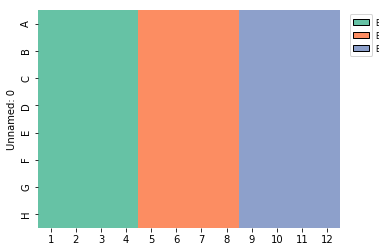

In [155]:
catheat.heatmap(lonza_nucleofection_buffer_96w.set_index("Unnamed: 0"), palette='Set2')

import values for experimental or control designation 


In [144]:
experimental_or_control_well= pd.read_csv('experimental_or_control.csv') # read in csv 
print(experimental_or_control_well.shape)
experimental_or_control_well

(8, 13)


,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12
0,A,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
1,B,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
2,C,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
3,D,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
4,E,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
5,F,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
6,G,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp,exp
7,H,exp,exp,exp,cntrl,exp,exp,exp,cntrl,exp,exp,exp,cntrl


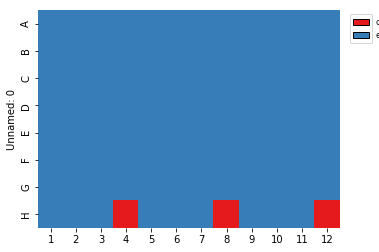

In [156]:
catheat.heatmap(experimental_or_control_well.set_index("Unnamed: 0"), palette='Set1')

### Change column names 
change unnamed: 0 to test_plate_96w_row_name (plate csv name _ row_names) so that we know that these indexes correspond to this plate. Do so by passing the name of the collumn to be renamed into a dictonary where you give the value of the name to be changed and the desired new name. 

### change name of experimental or control well 

In [81]:
experimental_or_control_well_renamed=experimental_or_control_well.rename(columns={"Unnamed: 0":"row_letter"})
print(experimental_or_control_well_renamed.shape)
print(experimental_or_control_well_renamed.head())

(8, 13)
  row_letter    1    2    3    4    5    6    7    8    9   10   11   12
0          A  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
1          B  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
2          C  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
3          D  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp
4          E  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp  exp


### change name for loza nucleofection buffer

In [82]:
lonza_nucleofection_buffer_96w_renamed=lonza_nucleofection_buffer_96w.rename(columns={"Unnamed: 0":"row_letter"})
print(lonza_nucleofection_buffer_96w_renamed.shape)
print(lonza_nucleofection_buffer_96w_renamed.head())

(8, 13)
  row_letter          1          2          3          4          5  \
0          A  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P2   
1          B  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P2   
2          C  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P2   
3          D  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P2   
4          E  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P1  Buffer_P2   

           6          7          8          9         10         11         12  
0  Buffer_P2  Buffer_P2  Buffer_P2  Buffer_P3  Buffer_P3  Buffer_P3  Buffer_P3  
1  Buffer_P2  Buffer_P2  Buffer_P2  Buffer_P3  Buffer_P3  Buffer_P3  Buffer_P3  
2  Buffer_P2  Buffer_P2  Buffer_P2  Buffer_P3  Buffer_P3  Buffer_P3  Buffer_P3  
3  Buffer_P2  Buffer_P2  Buffer_P2  Buffer_P3  Buffer_P3  Buffer_P3  Buffer_P3  
4  Buffer_P2  Buffer_P2  Buffer_P2  Buffer_P3  Buffer_P3  Buffer_P3  Buffer_P3  


## Other option that did not work to ask Olga about

### Restructure the dataset based on the row labels of a 96 well plate. 
For the pd.melt function we take id_vars which is the variable for which we want get the values corresponding to other variables in the table. In this case, we want the values for all other variables, which are all other collumns, because we did not specify a specific subset of variables. If we wanted to specify this subset we could use value_vars and pass in a list of the other collumns (variables) that we want to see the values for relative to column 0. For example, if we only selected collumn 1, we would see the values at each position in the id_vars collumn from the corresponding index position in column 1. We can name these columns for clarity. 

### Print out information about new data frame
• `.shape` to get the dimensions of the dataframe. Here we have 96 rows and 3 collumns. This is because we are getting values from every collumn in the plate (12) for each of the 8 row labels (A-H) in collumn unnamed: 0. 

• `.head()` to view the first entries in the dataframe. This requires parenthasis in calling the attribute as .head is a function that can take in arguments and is not intrinsic to the data frame, in that you canspecify how many rows you want to see. 

• `.index or .index.values` to get the index range (0-96) which means it godes from 0 up to 95 not including 95 in steps of 1. or .index.values to get the actual values of the index, a list from 0-95. 

• `.columns` to get the collumn names. 

• `type()` with the dataframe as the argument to get the type of the object. In this case we check that the object is still a dataframe. This is important because there are certain ways of selecting from a dataframe where the sliced object, if only one column can become a series not a dataframe.

### tidy format of nucleofection buffer 

In [91]:
lonza_nucleofection_buffer_96w_renamed_tidy = pd.melt(lonza_nucleofection_buffer_96w_renamed, 
                            id_vars= "row_letter", 
                            var_name="column_num",
                            value_name="lonza_nucleofection_buffer") #restructure data

lonza_nucleofection_buffer_96w_renamed_tidy["well_id"] = lonza_nucleofection_buffer_96w_renamed_tidy.row_letter + \
    lonza_nucleofection_buffer_96w_renamed_tidy.column_num
print(lonza_nucleofection_buffer_96w_renamed_tidy.shape)
lonza_nucleofection_buffer_96w_renamed_tidy.head()



(96, 4)


,row_letter,column_num,lonza_nucleofection_buffer,well_id
0,A,1,Buffer_P1,A1
1,B,1,Buffer_P1,B1
2,C,1,Buffer_P1,C1
3,D,1,Buffer_P1,D1
4,E,1,Buffer_P1,E1


### tidy format for experimental condition plate

In [95]:
experimental_or_control_well_renamed_tidy = pd.melt(experimental_or_control_well_renamed, 
                            id_vars= "row_letter", 
                            var_name="column_num",
                            value_name="experimental_or_control") #restructure data
experimental_or_control_well_renamed_tidy["well_id"] = experimental_or_control_well_renamed_tidy.row_letter + \
    experimental_or_control_well_renamed_tidy.column_num
print(experimental_or_control_well_renamed_tidy.shape)
experimental_or_control_well_renamed_tidy.head()


(96, 4)


,row_letter,column_num,experimental_or_control,well_id
0,A,1,exp,A1
1,B,1,exp,B1
2,C,1,exp,C1
3,D,1,exp,D1
4,E,1,exp,E1


## Merge tidy data frames 
notice that inner, outer, right and left did the same thing why?

In [157]:
merged_data = lonza_nucleofection_buffer_96w_renamed_tidy.merge(experimental_or_control_well_renamed_tidy, left_on="well_id" , right_on="well_id")
print(merged_data.shape)
merged_data.head()

(96, 7)


,row_letter_x,column_num_x,lonza_nucleofection_buffer,well_id,row_letter_y,column_num_y,experimental_or_control
0,A,1,Buffer_P1,A1,A,1,exp
1,B,1,Buffer_P1,B1,B,1,exp
2,C,1,Buffer_P1,C1,C,1,exp
3,D,1,Buffer_P1,D1,D,1,exp
4,E,1,Buffer_P1,E1,E,1,exp


In [163]:
merged_data_renamed=merged_data.rename(columns={"row_letter_x":"96_well_row_letter"}) # how to change col labels. 
print(merged_data_renamed.shape)
merged_data_renamed.head
merged_data_renamed


(96, 7)


,96_well_row_letter,column_num_x,lonza_nucleofection_buffer,well_id,row_letter_y,column_num_y,experimental_or_control
0,A,1,Buffer_P1,A1,A,1,exp
1,B,1,Buffer_P1,B1,B,1,exp
2,C,1,Buffer_P1,C1,C,1,exp
3,D,1,Buffer_P1,D1,D,1,exp
4,E,1,Buffer_P1,E1,E,1,exp
5,F,1,Buffer_P1,F1,F,1,exp
6,G,1,Buffer_P1,G1,G,1,exp
7,H,1,Buffer_P1,H1,H,1,exp
8,A,2,Buffer_P1,A2,A,2,exp
9,B,2,Buffer_P1,B2,B,2,exp


In [141]:
experimental_or_control_well_renamed_tidy.head() # don't want row letter and col number 

,row_letter,column_num,experimental_or_control,well_id
0,A,1,exp,A1
1,B,1,exp,B1
2,C,1,exp,C1
3,D,1,exp,D1
4,E,1,exp,E1


In [166]:
import numpy as np

experimental_or_control_well_renamed_tidy_shuffled = pd.DataFrame(experimental_or_control_well_renamed_tidy, 
                                                                  index=np.random.permutation(experimental_or_control_well_renamed_tidy.index))
experimental_or_control_well_renamed_tidy_shuffled.head()
indextest=np.random.permutation(experimental_or_control_well_renamed_tidy.index)
print(indextest)


[89 22  6 28 53 90 39 11 78  2 83 15 27 82 38 73 68 92 94 87 41 44 19 56 26
 60 13 20 66 55 85 64 48 63 51  9 69  0 84 23 34 32 79 29 76 50 46 43  7 14
 52 18 33 80 49 36 40 61 65 24 30 75 17  4 58  3 57 10 67 42 59 47 91 86 71
 72 62 95 74 12 70  5  1 37 88 16 45 93 25  8 35 81 31 21 77 54]


In [168]:
merged_data = lonza_nucleofection_buffer_96w_renamed_tidy.merge(experimental_or_control_well_renamed_tidy_shuffled, 
                                                                left_on="well_id" , right_on="well_id")
print(merged_data.shape)
merged_data.head()

(96, 7)


,row_letter_x,column_num_x,lonza_nucleofection_buffer,well_id,row_letter_y,column_num_y,experimental_or_control
0,A,1,Buffer_P1,A1,A,1,exp
1,B,1,Buffer_P1,B1,B,1,exp
2,C,1,Buffer_P1,C1,C,1,exp
3,D,1,Buffer_P1,D1,D,1,exp
4,E,1,Buffer_P1,E1,E,1,exp


In [77]:
merged_data=lonza_nucleofection_buffer_96w_tidy.merge(experimental_or_control_well_tidy, left_on=["Unnamed: 0", "column_num"], right_on=["Unnamed: 0", "column_num"])
print(merged_data.shape)
merged_data

(96, 4)


,Unnamed: 0,column_num,lonza_nucleofection_buffer_well_value,experimental_or_control_well_well_value
0,A,1,Buffer_P1,exp
1,B,1,Buffer_P1,exp
2,C,1,Buffer_P1,exp
3,D,1,Buffer_P1,exp
4,E,1,Buffer_P1,exp
5,F,1,Buffer_P1,exp
6,G,1,Buffer_P1,exp
7,H,1,Buffer_P1,exp
8,A,2,Buffer_P1,exp
9,B,2,Buffer_P1,exp


## Merge on just one column
merge on row labels: this lists all the aligns the data so that the row labels are shared. For the left data frame the column labels are repeated and aligned with the unique column labled, from 1-12 for the right data frame. 

merge on column labels: this gives the first column for both of the data sets shared. For the left df it repeats that row lables (A-H) and gives a unqiue value A-H for the right data frame. 

In [65]:
merged_data=lonza_nucleofection_buffer_96w_tidy.merge(experimental_or_control_well_tidy, left_on=["Unnamed: 0"], right_on=["Unnamed: 0"])
print(merged_data.shape)
merged_data

(1152, 5)


,Unnamed: 0,column_num_x,lonza_nucleofection_buffer_well_value,column_num_y,experimental_or_control_well_well_value
0,A,1,Buffer_P1,1,exp
1,A,1,Buffer_P1,2,exp
2,A,1,Buffer_P1,3,exp
3,A,1,Buffer_P1,4,exp
4,A,1,Buffer_P1,5,exp
5,A,1,Buffer_P1,6,exp
6,A,1,Buffer_P1,7,exp
7,A,1,Buffer_P1,8,exp
8,A,1,Buffer_P1,9,exp
9,A,1,Buffer_P1,10,exp


In [66]:
merged_data=lonza_nucleofection_buffer_96w_tidy.merge(experimental_or_control_well_tidy, left_on=["column_num"], right_on=["column_num"])
print(merged_data.shape)
merged_data

(768, 5)


,Unnamed: 0_x,column_num,lonza_nucleofection_buffer_well_value,Unnamed: 0_y,experimental_or_control_well_well_value
0,A,1,Buffer_P1,A,exp
1,A,1,Buffer_P1,B,exp
2,A,1,Buffer_P1,C,exp
3,A,1,Buffer_P1,D,exp
4,A,1,Buffer_P1,E,exp
5,A,1,Buffer_P1,F,exp
6,A,1,Buffer_P1,G,exp
7,A,1,Buffer_P1,H,exp
8,B,1,Buffer_P1,A,exp
9,B,1,Buffer_P1,B,exp


## Joining well_type and buffers

In [103]:
cols_to_drop = ['row_letter', 'column_num']

buffers = lonza_nucleofection_buffer_96w_renamed_tidy.set_index("well_id")
buffers = buffers.drop(cols_to_drop, axis=1)
buffers.head()

,lonza_nucleofection_buffer
well_id,
A1,Buffer_P1
B1,Buffer_P1
C1,Buffer_P1
D1,Buffer_P1
E1,Buffer_P1


In [106]:
well_type = experimental_or_control_well_renamed_tidy.set_index("well_id")
well_type = well_type.drop(cols_to_drop, axis=1)
well_type.head()

,experimental_or_control
well_id,
A1,exp
B1,exp
C1,exp
D1,exp
E1,exp


In [220]:
joined=well_type.join(buffers)
joined

,experimental_or_control,lonza_nucleofection_buffer
well_id,,
A1,exp,Buffer_P1
B1,exp,Buffer_P1
C1,exp,Buffer_P1
D1,exp,Buffer_P1
E1,exp,Buffer_P1
F1,exp,Buffer_P1
G1,exp,Buffer_P1
H1,exp,Buffer_P1
A2,exp,Buffer_P1


In [185]:
## summarize your conditions in each section. 

counts={}
joined["experimental_or_control"]
for cond in joined["experimental_or_control"]:
    if cond in counts.keys():
        counts[cond]+=1
    else:
        counts[cond]=1
print(counts)


{'exp': 93, 'cntrl': 3}


In [208]:
cols=joined.columns
cols
y=cols[0]
y

all_counts={}

## summarize your conditions in each section. 
cols=joined.columns
counts={}
for cond in joined[y]:
    if cond in counts.keys():
        counts[cond]+=1
    else:
        counts[cond]=1
    all_counts[y]=counts
    
print(all_counts)
len(all_counts)

{'experimental_or_control': {'exp': 93, 'cntrl': 3}}


1

In [215]:
print(len(cols)-1)

1


In [241]:

##loop through all columns and get summary information 

cols=joined.columns
print(cols)
length=len(cols)
print(length)
print(range(1))

all_counts={}
for i in range(length):
    col_name=(cols[i])

## summarize your conditions in each section. 
    counts={}
    for cond in joined[col_name]:
        if cond in counts.keys():
            counts[cond]+=1
        else:
            counts[cond]=1
        all_counts[col_name]=counts
    
print(all_counts)

Index(['experimental_or_control', 'lonza_nucleofection_buffer'], dtype='object')
2
range(0, 1)
{'experimental_or_control': {'exp': 93, 'cntrl': 3}, 'lonza_nucleofection_buffer': {'Buffer_P1': 32, 'Buffer_P2': 32, 'Buffer_P3': 32}}


In [172]:
well_type_scrambled = well_type.loc[scrambled_wells] # what are we doing here. 
well_type_scrambled.head()

,experimental_or_control
well_id,
C4,exp
E11,exp
C1,exp
H7,exp
E9,exp


In [169]:
well_type_scrambled.join(buffers)
buffers.join(well_type_scrambled)

,lonza_nucleofection_buffer,experimental_or_control
well_id,,
A1,Buffer_P1,exp
B1,Buffer_P1,exp
C1,Buffer_P1,exp
D1,Buffer_P1,exp
E1,Buffer_P1,exp
F1,Buffer_P1,exp
G1,Buffer_P1,exp
H1,Buffer_P1,exp
A2,Buffer_P1,exp


In [ ]:
wells_tidy['column_number'] = wells_tidy['Empty96ColNum'].astype(int)
print(wells_tidy.shape)
wells_tidy.head()

Wrong way! We did numbers, lettesr for `wells_tidy` and letters, numbers for `buffer_tidy`

In [ ]:
wells_tidy.merge(buffer_tidy, left_on=[ "Empty96ColNum", 'Unnamed: 0',], 
                 right_on=['row_letter', 'column_number'])

In [ ]:
wells_tidy.merge(buffer_tidy, left_on=['Unnamed: 0', "Empty96ColNum"], 
                 right_on=['row_letter', 'column_number'])

In [ ]:
wells_tidy.merge(buffer_tidy, left_on=['Unnamed: 0', "column_number"], 
                 right_on=['row_letter', 'column_number'])

In [ ]:
Empty96W_ColumnList.columns

In [ ]:
type(Empty96W_ColumnList)

In [ ]:
SelectValues_Empty96WellID=Empty96W_ColumnList.iloc[:,1] # select needed collumn 

In [ ]:
SelectValues_Empty96WellID

In [ ]:
SelectValues_Empty96WellID_df=SelectValues_Empty96WellID.to_frame() # turn series into df

In [ ]:
SelectValues_Empty96WellID_df

In [ ]:
type(SelectValues_Empty96WellID)

In [ ]:
Empty96W_ColumnList2=pd.melt(empty_96W, var_name="Empty96ColNum2",value_name="Empty96WellID2")

In [ ]:
SelectValues_Empty96WellID2=Empty96W_ColumnList2.iloc[:,1]

In [ ]:
SelectValues_Empty96WellID2

In [ ]:
SelectValues_Empty96WellID2_df=SelectValues_Empty96WellID2.to_frame()

In [ ]:
SelectValues_Empty96WellID2_df

In [ ]:
pd.concat([SelectValues_Empty96WellID_df,SelectValues_Empty96WellID2_df], axis=1)